<a href="https://colab.research.google.com/github/RashmiJK/PGP-AIML-FoodHub-EDA/blob/main/Learner_Notebook_LC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [35]:
# Install the libraries
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [37]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [39]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv') ## Fill the blank to read the data

In [46]:
# Set display width for pandas DataFrames
pd.set_option('display.width', 400)

In [47]:
# Examine the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [48]:
# Examine last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


Observation: The 'rating' column contains 'Not given' values.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [55]:
# Examine the shape of the dataset
df.shape

(1898, 9)

### **Answer 1:** The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Answer 2:** The columns in this dataset have float, int and object datatype.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [10]:
# Check for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


### **Answer 3:** There any no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [56]:
# Get the summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### **Answer 4:** The minimum food preparation time is 20 minutes, the mean is approximately 27 minutes, and the maximum is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
df['rating'].value_counts()

,rating
Not given,736
5,588
4,386
3,188


### **Answer 5:** 736 orders out of 1898 are not rated.

In [13]:
# check for duplicates
df.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [60]:
# Check unique order ID
print(df['order_id'].nunique())

1898


In [63]:
# Check for duplicates
print(df.duplicated().sum())

0


There are no duplicate orders in the dataset.

#### Customer ID

In [65]:
# check nunique of 'customer_id'
print(f"There are {df['customer_id'].nunique()} unique customers. Their id's are = {df['customer_id'].unique()}")

# Calculate the number of repeat orders by returning customers
repeat_orders = df.shape[0] - df['customer_id'].nunique()

# Calculate the total number of orders
total_orders = df.shape[0]

print(f"Repeat orders: {repeat_orders}")

# Calculate the percentage of repeat orders
percentage_repeat_orders = (repeat_orders / total_orders) * 100
print(f"Percentage of repeat orders: {percentage_repeat_orders:.2f}%")

There are 1200 unique customers. Their id's are = [337525 358141  66393 ...  97838 292602 397537]
Repeat orders: 698
Percentage of repeat orders: 36.78%


In [71]:
# Get the count of orders for each customer
customer_order_counts = df['customer_id'].value_counts()

# Get the number of customers who have repurchased (placed more than one order)
customers_who_repurchased = (customer_order_counts > 1).sum()
print(f"Number of customers who repurchased: {customers_who_repurchased}")

# Get the total number of unique customers
total_unique_customers = df['customer_id'].nunique()

# Calculate the customer repurchase rate
customer_repurchase_rate = (customers_who_repurchased / total_unique_customers) * 100

print(f"Customer repurchase rate: {customer_repurchase_rate:.2f}%")

Number of customers who repurchased: 416
Customer repurchase rate: 34.67%


Observation -
* Analysis of 1898 orders indicates they were placed by 1200 unique customers.
* Repeat orders are observed, accounting for 698 instances, which constitutes 36.78% of the total orders.
* Among the 1200 unique customers, only 34.67% have placed more than one order.
* This suggests that a majority, 65.33%, have not returned for a second order.
* An opportunity exists for business improvement by implementing strategies to encourage repeat patronage from these non-returning customers.



#### Restaurant name

In [92]:
# check nunique value of 'restaurant_name'
total_unique_restaurants = df['restaurant_name'].nunique()
print(f"There are {total_unique_restaurants} unique restaurants.")

# Count restaurants with one order
restaurants_with_one_order = (df['restaurant_name'].value_counts() <= 1).sum()
print(f"Number of restaurants with only one order: {restaurants_with_one_order}")

# Count restaurants with multiple orders
restaurants_with_multiple_orders = total_unique_restaurants - restaurants_with_one_order
print(f"Number of restaurants with multiple orders: {restaurants_with_multiple_orders}")

There are 178 unique restaurants.
Number of restaurants with only one order: 50
Number of restaurants with multiple orders: 128


In [93]:
# Group by restaurant name and check the number of unique cuisine types for each
restaurant_cuisine_counts = df.groupby('restaurant_name')['cuisine_type'].nunique()

# Filter for restaurants that have more than one unique cuisine type
restaurants_with_multiple_cuisines = restaurant_cuisine_counts[restaurant_cuisine_counts > 1]

# Print the names of the restaurants that cook multiple cuisines and the number of cuisines they offer
print("Restaurants that cook multiple cuisines:")
print(restaurants_with_multiple_cuisines)

Restaurants that cook multiple cuisines:
restaurant_name
The Meatball Shop    2
Name: cuisine_type, dtype: int64


In [94]:
# Group by restaurant name and aggregate cuisine types into a list
restaurant_cuisine_list = df.groupby('restaurant_name')['cuisine_type'].unique()

# Filter for restaurants that have more than one unique cuisine type
restaurants_with_multiple_cuisines_and_types = restaurant_cuisine_list[restaurant_cuisine_list.apply(len) > 1]

# Print the names of the restaurants that cook multiple cuisines and the cuisine types
print("Restaurants that cook multiple cuisines and their cuisine types:")
print(restaurants_with_multiple_cuisines_and_types)

Restaurants that cook multiple cuisines and their cuisine types:
restaurant_name
The Meatball Shop    [Italian, American]
Name: cuisine_type, dtype: object


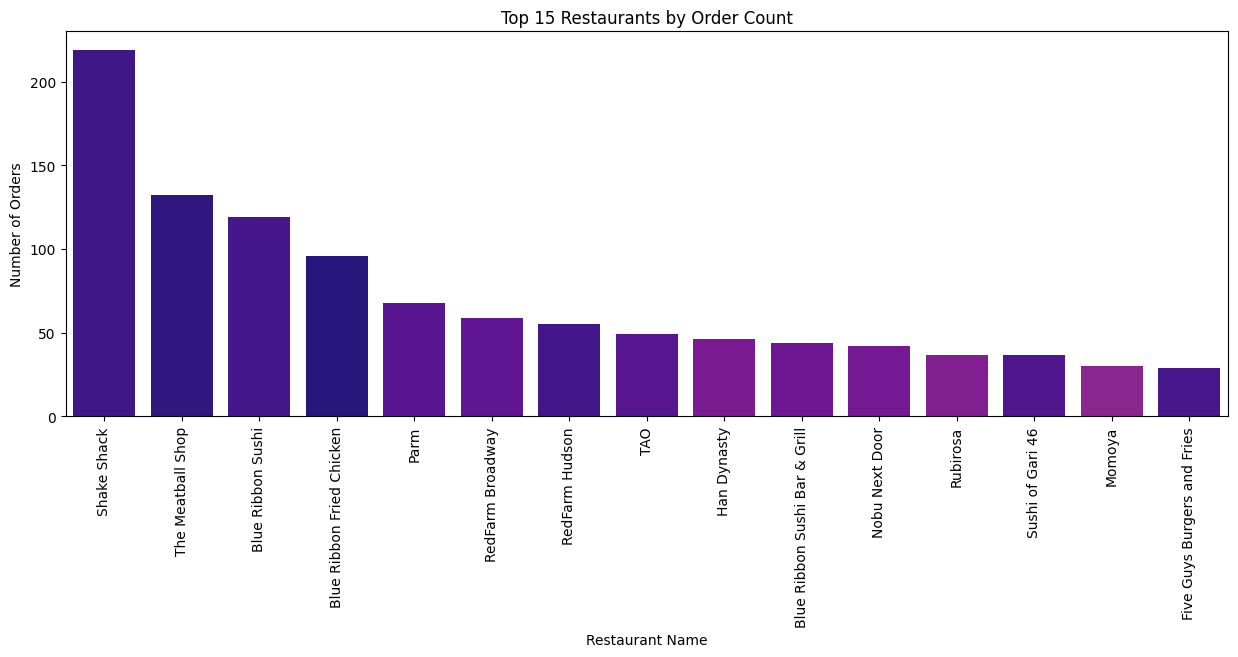

In [117]:
# Analyze top 15 restaurants by order count
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='restaurant_name', order=df['restaurant_name'].value_counts().head(15).index, palette = 'plasma', hue='restaurant_name', legend=False)
plt.xticks(rotation=90)
plt.title('Top 15 Restaurants by Order Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.show()

Observation -
* The dataset includes orders from a total of 178 unique restaurants.
* A significant number of these restaurants (50 out of 178) have only received one order in the dataset. This suggests that a considerable portion of the restaurants on the platform may not be generating repeat business through the app, at least within the timeframe of this data.
* The majority of restaurants (128 out of 178) have received multiple orders, indicating a core group of restaurants that are regularly utilized by customers.
* Out of all the unique restaurants, only one restaurant, "The Meatball Shop," offers more than one unique cuisine type according to this data. This suggests that most restaurants on the platform specialize in a single cuisine type.

#### Cuisine type

In [95]:
# Check unique cuisine type
print(df['cuisine_type'].unique())

# Check nunique value of 'cuisine_type'
print(df['cuisine_type'].nunique())

# Find the value counts
print(df['cuisine_type'].value_counts())

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']
14
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


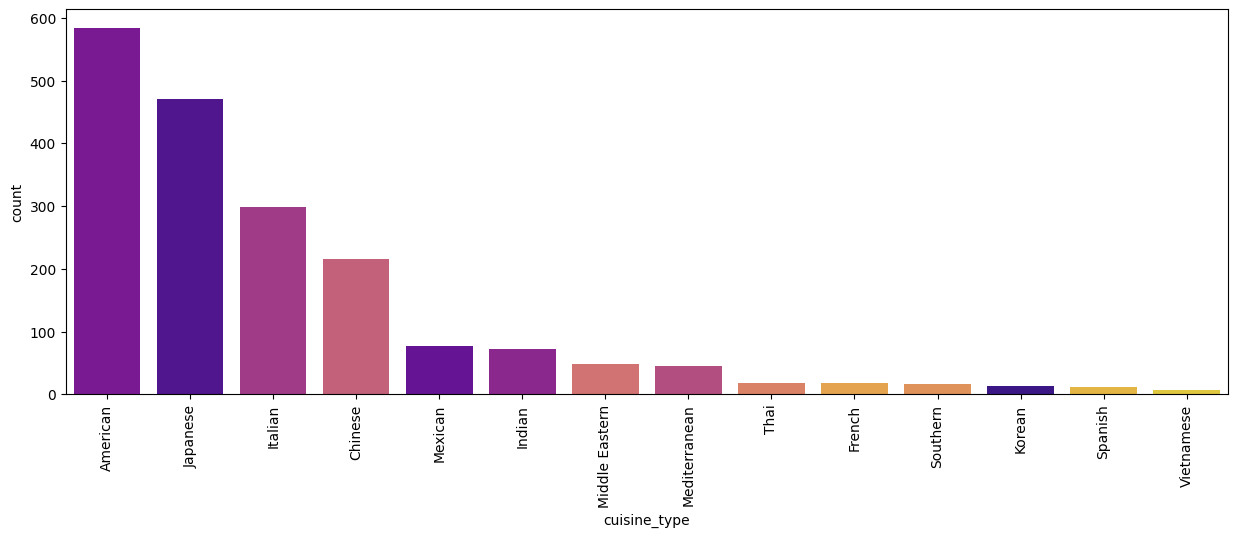

In [97]:
## Create a countplot for cuisine type.
plt.figure(figsize = (15,5))
ax = sns.countplot(data = df, x = 'cuisine_type', order = df['cuisine_type'].value_counts(ascending=False).index, palette = 'plasma', hue='cuisine_type', legend=False)
plt.xticks(rotation = 90)
plt.show()

In [114]:
# Calculate the percentage of orders by cuisine type
print(df['cuisine_type'].value_counts(normalize=True) * 100)

American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64


Observation -
* Popular cuisines in this dataset are American, Japanese, Italian and Chinese.
* They comprise almost 80% of the orders


#### Cost of the order

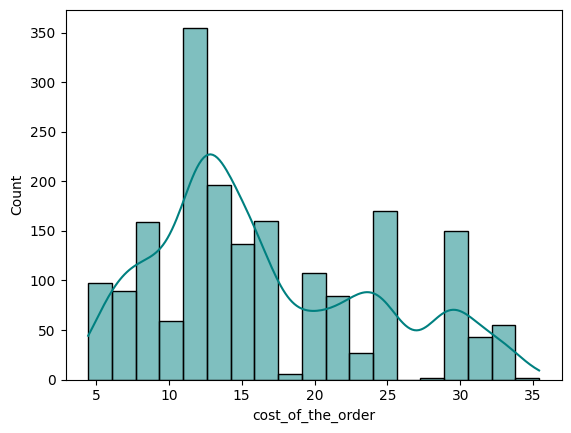

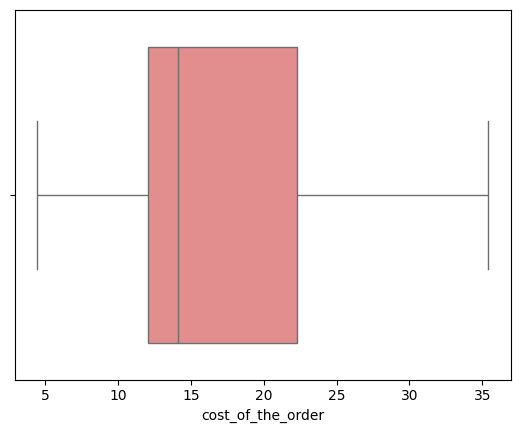

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64


In [120]:
sns.histplot(data=df,x='cost_of_the_order', kde = True, color = 'teal') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order', color = 'lightcoral') ## Boxplot for the cost of order
plt.show()
print(df['cost_of_the_order'].describe().T)

Observation -
* The average cost of an order is approximately 16.50 dollars.
* The median cost of an order is 14.14 dollars, which is close to the mean, suggesting the distribution of order costs is relatively symmetrical, although the slightly higher mean suggests a small right skew.
* The interquartile range (IQR) from the 25th percentile (12.08 dollars) to the 75th percentile (22.30 dollars) covers a range of about 10.22 dollars, indicating the middle 50% of order costs fall within this range.
* The minimum order cost is 4.47 dollars and the maximum is 35.41 dollars.
* Specifically, the 50th percentile (median) is 14.14 dollars, meaning that 50% of the orders cost 14.14 dollars or less.


#### Day of the week

In [127]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

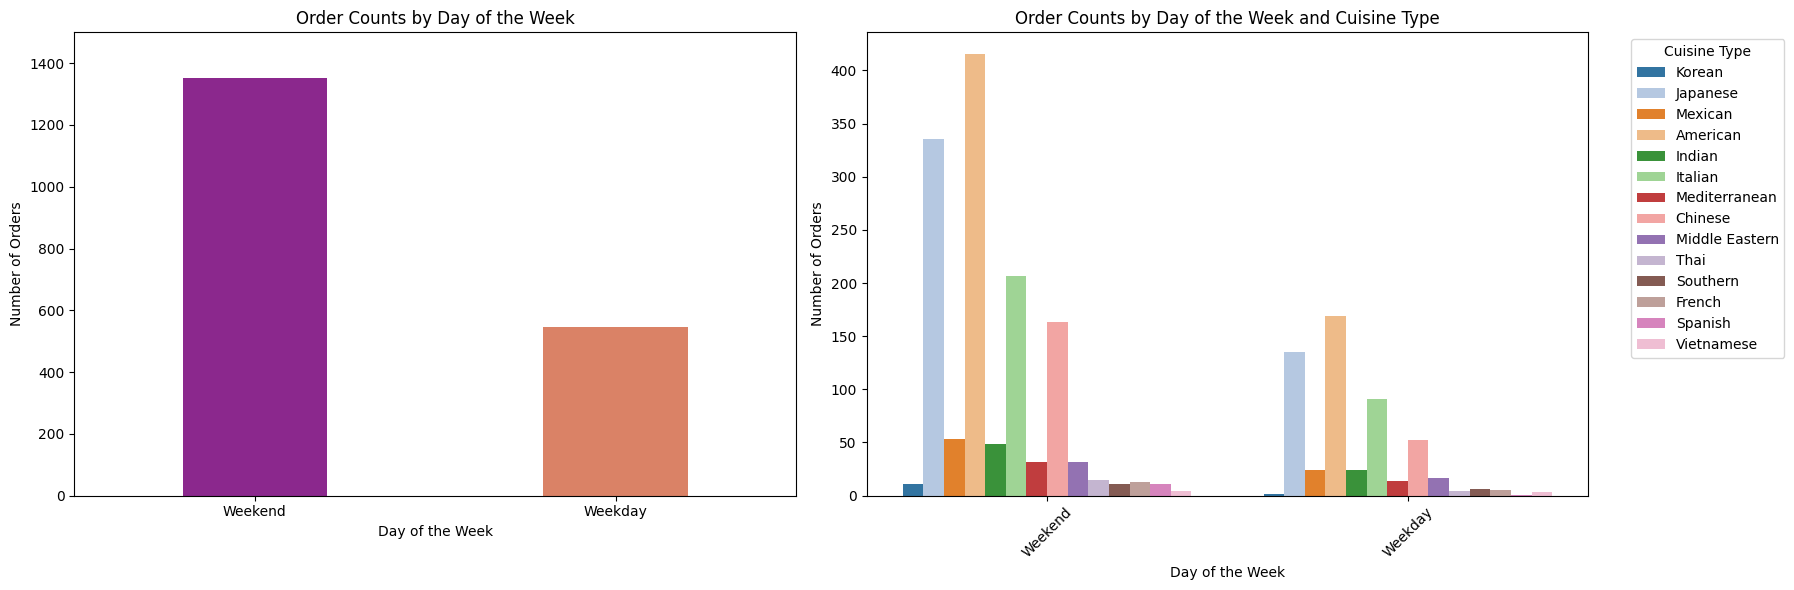

In [128]:
## Create countplots for day of the week side-by-side
plt.figure(figsize = (18, 6)) # Adjust figure size to accommodate two plots

# Subplot 1: Day of the week countplot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(data = df, x = 'day_of_the_week', palette = 'plasma', hue='day_of_the_week', legend=False, width = 0.4)
plt.title('Order Counts by Day of the Week') # Add a title for clarity
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.ylim(0, 1500) # Set a consistent y-limit for comparison if needed

# Subplot 2: Day of the week countplot with cuisine type hue
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.countplot(data = df, x = 'day_of_the_week', hue = 'cuisine_type', palette = 'tab20') # Add hue
plt.xticks(rotation = 45) # Rotate x-axis labels if they overlap due to hue
plt.title('Order Counts by Day of the Week and Cuisine Type') # Add a title for clarity
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.legend(title='Cuisine Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout() # Adjust layout to prevent overlapping

plt.show()

In [34]:
# Get the value counts for 'day_of_the_week'
day_counts = df['day_of_the_week'].value_counts()

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage for each day
percentage_orders = (day_counts / total_orders) * 100

print("Percentage of orders by day of the week:")
print(percentage_orders)


Percentage of orders by day of the week:
Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64


Observation -
* Orders are higher on the weekends compared to weekdays.
* The volume of weekend orders is 71% of the total, and weekday orders are 28%.

#### Rating

In [148]:
# Check the unique values and their counts for the 'rating' column
print("Unique values in 'rating' column:", df['rating'].unique())

# Get the counts of each rating value
rating_counts = df['rating'].value_counts()
print("\nValue counts for 'rating' column:")
print(rating_counts)

# Get the percentage of each rating value
rating_percentages = df['rating'].value_counts(normalize=True) * 100
print("\nPercentage distribution for 'rating' column:")
print(rating_percentages)


Unique values in 'rating' column: ['Not given' '5' '3' '4']

Value counts for 'rating' column:
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

Percentage distribution for 'rating' column:
Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: rating, dtype: float64


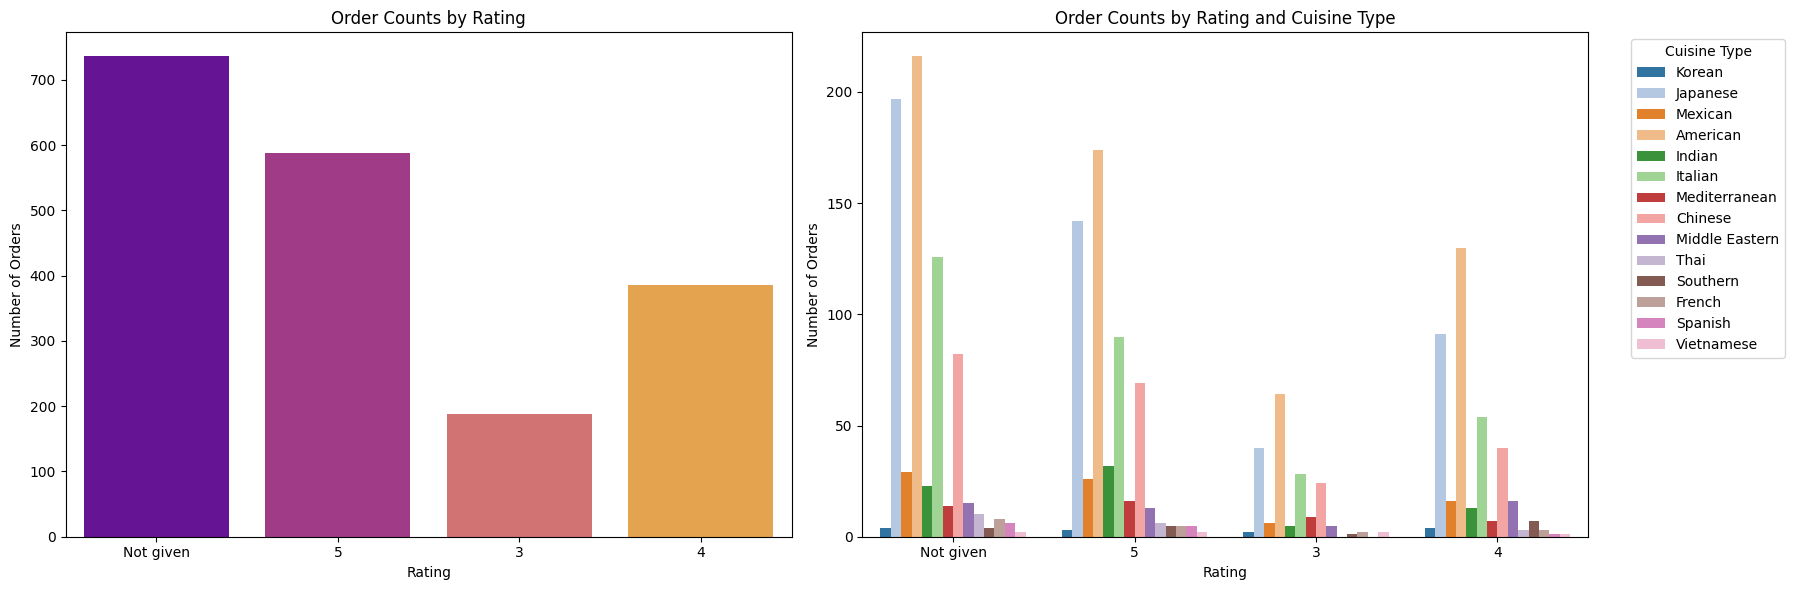

In [149]:
## Create countplots for rating side-by-side
plt.figure(figsize = (18, 6)) # Adjust figure size

# Subplot 1: Rating countplot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(data = df, x = 'rating', palette = 'plasma', hue='rating', legend=False)
plt.title('Order Counts by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')

# Subplot 2: Rating countplot with cuisine type hue
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.countplot(data = df, x = 'rating', hue = 'cuisine_type', palette = 'tab20') # Using 'tab20' for more distinct colors
plt.title('Order Counts by Rating and Cuisine Type')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.legend(title='Cuisine Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout() # Adjust layout

plt.show()

In [150]:
# Check the number of orders with 'Not given' rating for each restaurant
df_not_given = df[df['rating'] == 'Not given']['cuisine_type'].value_counts()
df_not_given[df_not_given > 1]


,cuisine_type
American,216
Japanese,197
Italian,126
Chinese,82
Mexican,29
Indian,23
Middle Eastern,15
Mediterranean,14
Thai,10
French,8


Observations -
* 736 out of 1898 orders are not rated which comprises of 38.7%

#### Food Preparation time

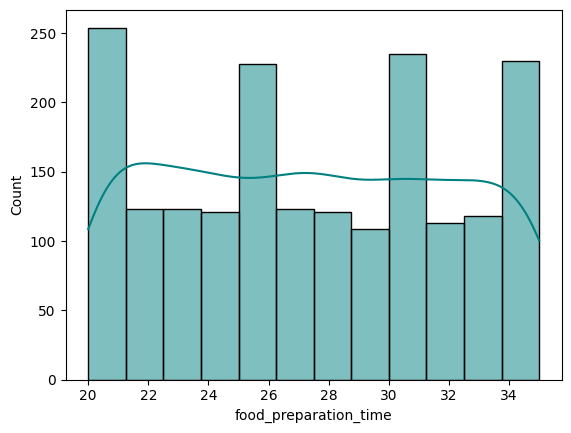

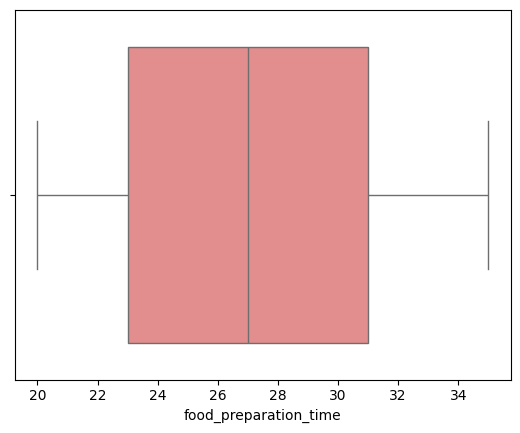

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


In [162]:
sns.histplot(data=df,x='food_preparation_time', kde = True, color = 'teal') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time', color = 'lightcoral') ## Complete the code to plot the boxplot for the cost of order
plt.show()
print(df['food_preparation_time'].describe().T)

#### Delivery time

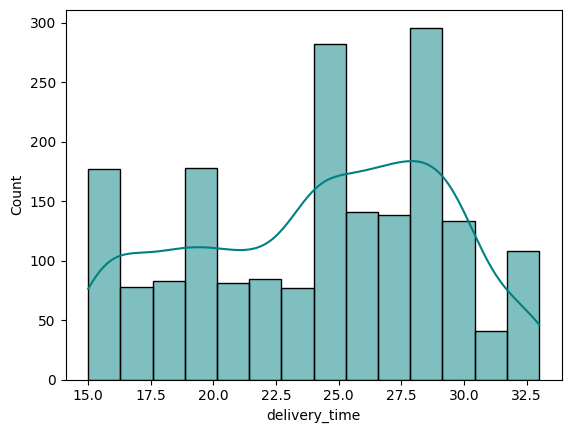

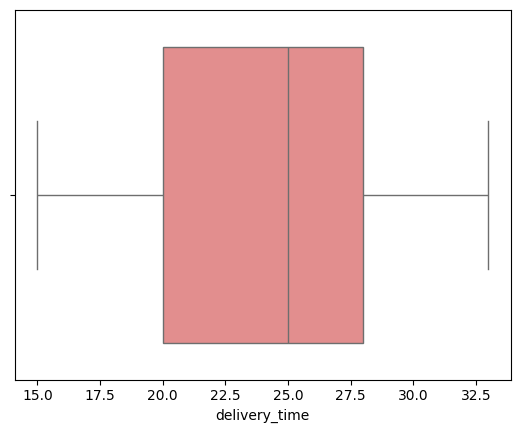

In [ ]:
sns.histplot(data=df,x='delivery_time', kde = True, color = 'teal') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time', color = 'lightcoral') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [39]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) ## Complete the code

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


### **Answer 7:** Top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [41]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Complete the code to check unique values for the cuisine type on weekend

,cuisine_type
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15
French,13


### **Answer 8:** The most popular cuisine on weekends is American.

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [45]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Answer 9:** 29.24% of the orders cost more than 20 dollars?

### **Question 10:** What is the mean order delivery time? [1 mark]

In [46]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Answer 10:** The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [47]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)  ## Write the appropriate column name to get the top 5 cmost frequent customers

,customer_id
52832,13
47440,10
83287,9
250494,8
259341,7


### Answer 11


### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

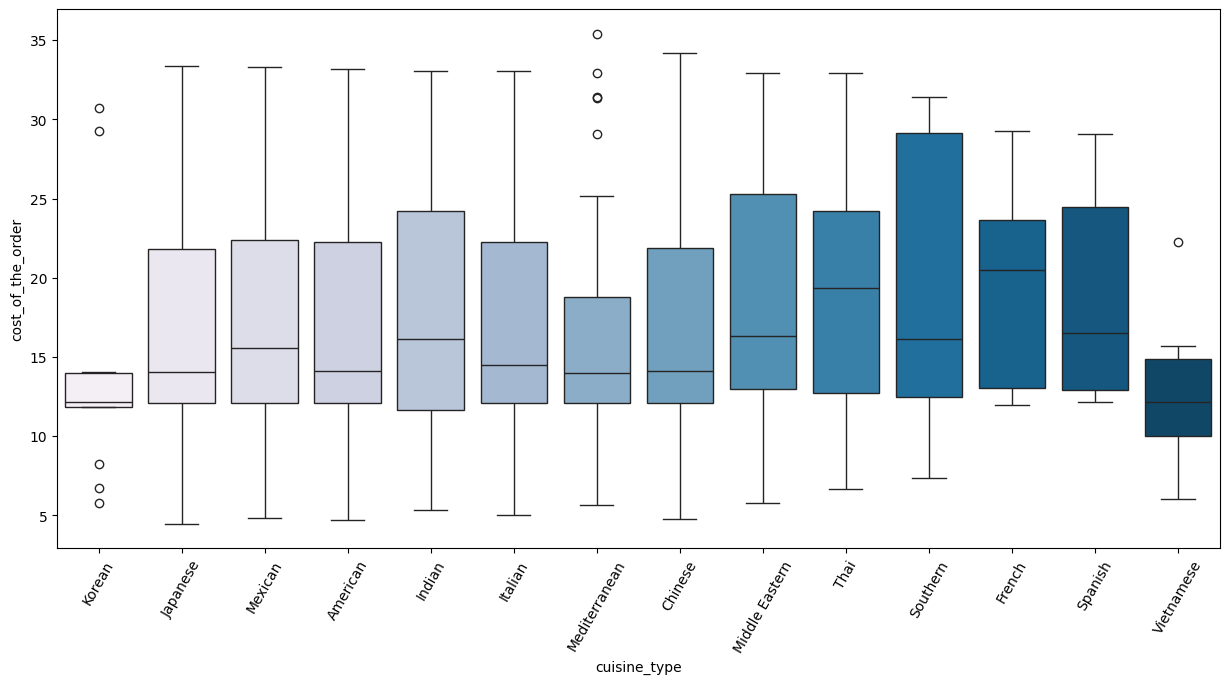

In [48]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

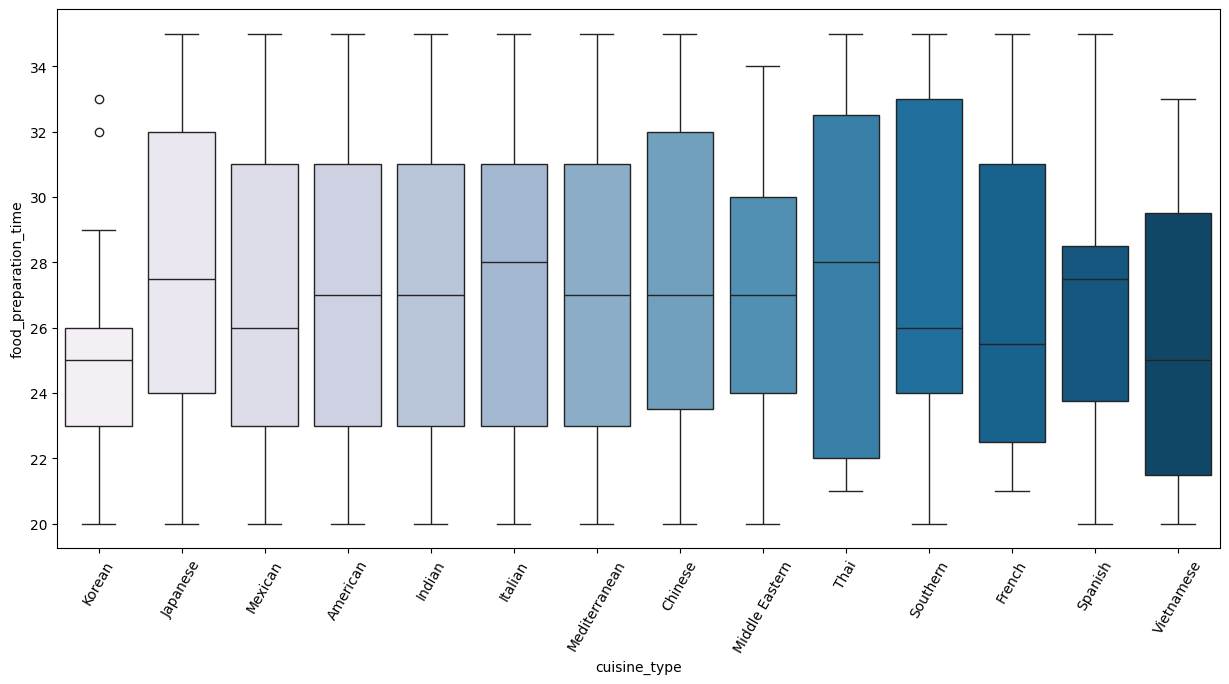

In [49]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df, palette = 'PuBu', hue = 'cuisine_type')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

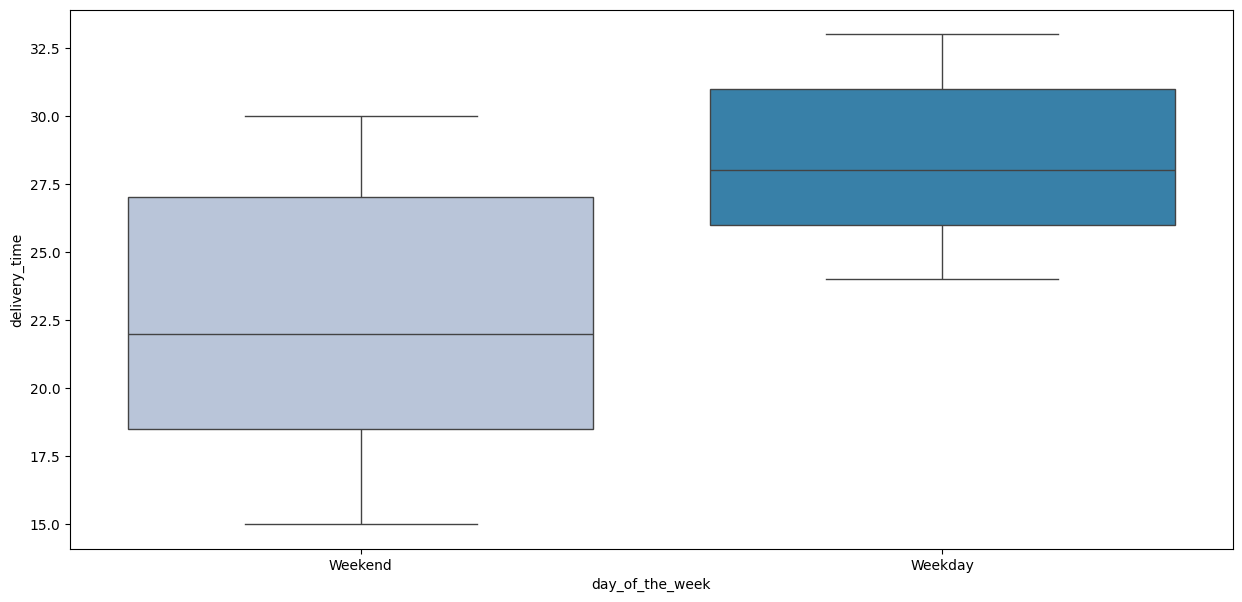

In [50]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'PuBu', hue = 'day_of_the_week')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [52]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


####  Top restaurants by revenue generated.

#### Rating vs Delivery time

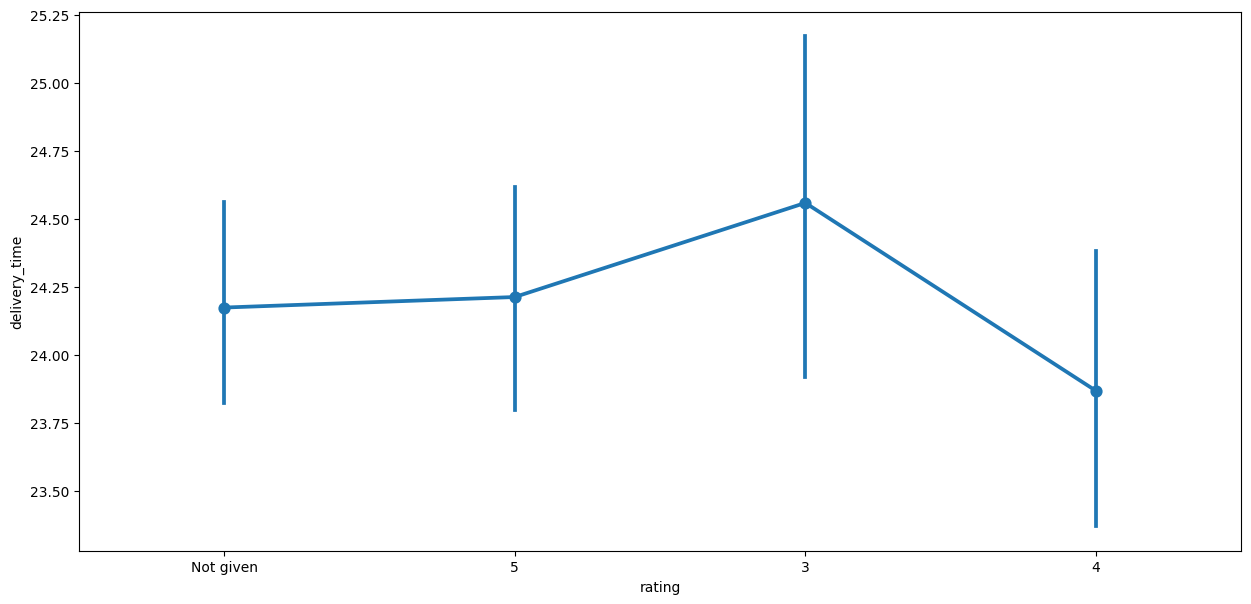

In [54]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

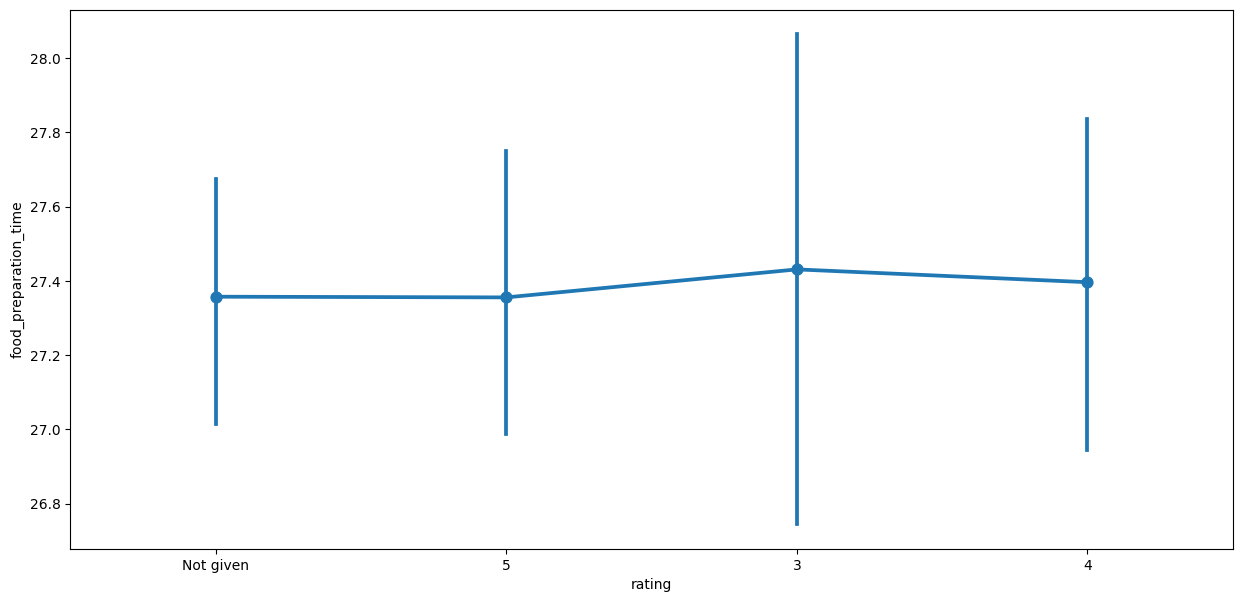

In [55]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

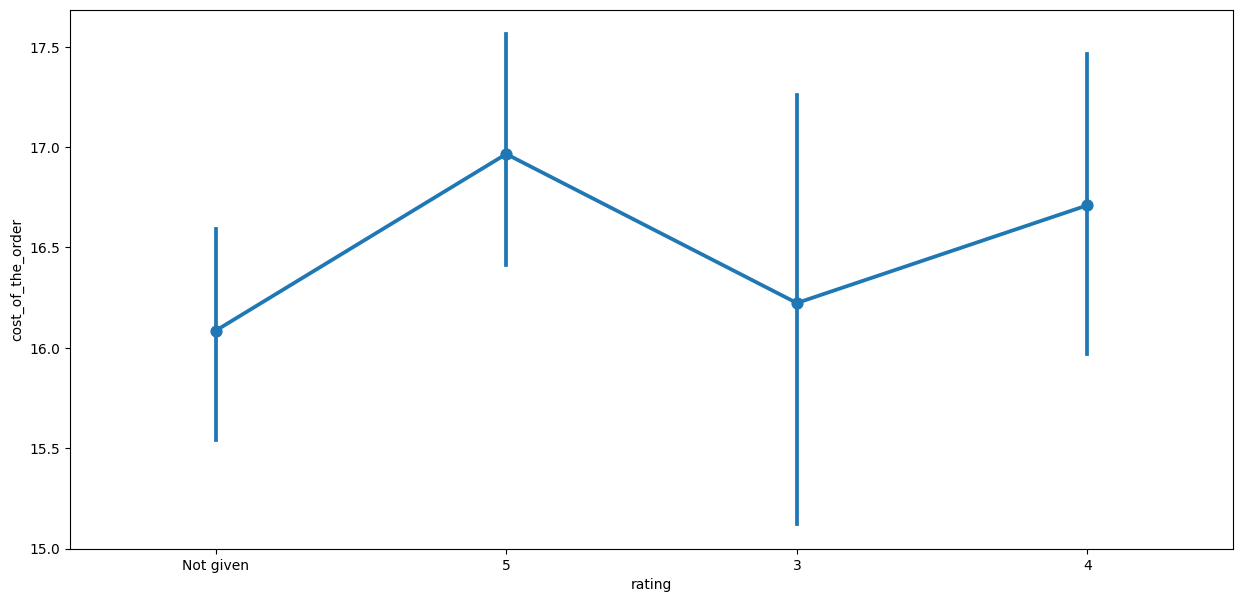

In [56]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

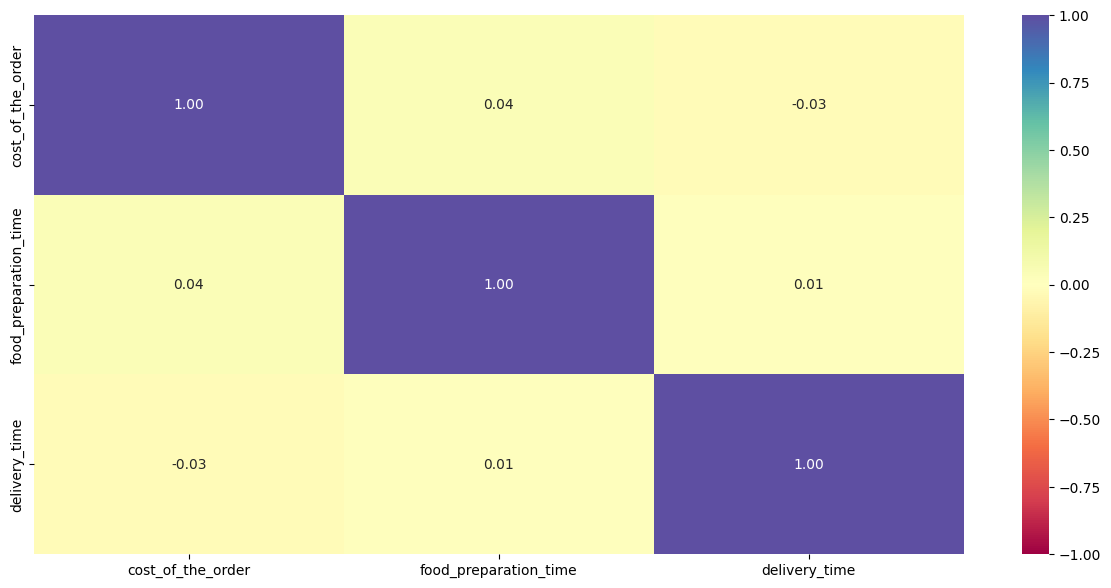

In [68]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True,  vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [7]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
print(df_rating_count.head())

             restaurant_name  rating
0                Shake Shack     133
1          The Meatball Shop      84
2          Blue Ribbon Sushi      73
3  Blue Ribbon Fried Chicken      64
4           RedFarm Broadway      41


In [12]:
pd.set_option('display.width', 300)

In [19]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50 ]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [20]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [22]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [31]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
df_more_than_60_mins = df[df['total_time'] > 60]['total_time'].count()
percentage_df_more_than_60_mins = (df_more_than_60_mins / df.shape[0]) * 100
print('The percentage of orders that take more than 60 minutes to get delivered is', round(percentage_df_more_than_60_mins, 2), '%')


The percentage of orders that take more than 60 minutes to get delivered is 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [33]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---